In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 20, 10
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [2]:
data = pd.read_csv('bavl_data.csv')

In [3]:
data

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,BAVL,D,25.03.2009,10:00:00,0.0500,0.0500,0.0500,0.0500,40000
1,BAVL,D,26.03.2009,10:00:00,0.0804,0.0816,0.0790,0.0810,3870000
2,BAVL,D,27.03.2009,10:00:00,0.0805,0.0805,0.0790,0.0790,1070000
3,BAVL,D,30.03.2009,10:00:00,0.0785,0.0785,0.0785,0.0785,650000
4,BAVL,D,01.04.2009,10:00:00,0.0800,0.0810,0.0800,0.0810,790000
5,BAVL,D,02.04.2009,10:00:00,0.0825,0.0865,0.0810,0.0865,1570000
6,BAVL,D,03.04.2009,10:00:00,0.0900,0.1130,0.0900,0.1030,5140000
7,BAVL,D,06.04.2009,10:00:00,0.1055,0.1280,0.1055,0.1250,3790000
8,BAVL,D,07.04.2009,10:00:00,0.1230,0.1230,0.1197,0.1199,1240000
9,BAVL,D,08.04.2009,10:00:00,0.1100,0.1185,0.1090,0.1180,3150000


In [4]:
ts_data = data

In [5]:
ts_data['<DATE>'] = [pd.to_datetime(date, format='%dd%mm%yy', errors='ignore') for date in ts_data['<DATE>']]

In [6]:
[pd.to_datetime(date, format='%dd%mm%yy', errors='ignore') for date in ts_data['<DATE>']][:10]

['25.03.2009',
 '26.03.2009',
 '27.03.2009',
 '30.03.2009',
 '01.04.2009',
 '02.04.2009',
 '03.04.2009',
 '06.04.2009',
 '07.04.2009',
 '08.04.2009']

In [7]:
ts_data['<DATE>'] = pd.to_datetime(pd.Series(ts_data['<DATE>']), format="%d.%m.%Y")

In [8]:
ts_data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,BAVL,D,2009-03-25,10:00:00,0.0500,0.0500,0.0500,0.0500,40000
1,BAVL,D,2009-03-26,10:00:00,0.0804,0.0816,0.0790,0.0810,3870000
2,BAVL,D,2009-03-27,10:00:00,0.0805,0.0805,0.0790,0.0790,1070000
3,BAVL,D,2009-03-30,10:00:00,0.0785,0.0785,0.0785,0.0785,650000
4,BAVL,D,2009-04-01,10:00:00,0.0800,0.0810,0.0800,0.0810,790000


In [9]:
ts_data = ts_data.drop(columns=['<TICKER>', '<PER>', '<TIME>', '<LOW>', '<HIGH>', '<CLOSE>', '<VOL>'])

In [10]:
ts_data.head()

,<DATE>,<OPEN>
0,2009-03-25,0.0500
1,2009-03-26,0.0804
2,2009-03-27,0.0805
3,2009-03-30,0.0785
4,2009-04-01,0.0800


In [11]:
ts_data = pd.Series.from_csv('timeseries_data.csv') 

/anaconda3/lib/python3.5/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [12]:
ts_data.head()

2009-03-25    0.0500
2009-03-26    0.0804
2009-03-27    0.0805
2009-03-30    0.0785
2009-04-01    0.0800
dtype: float64

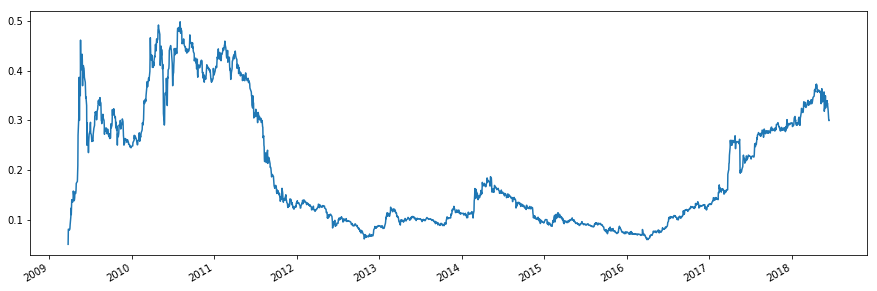

In [13]:
ts_data.plot(figsize=(15, 5))

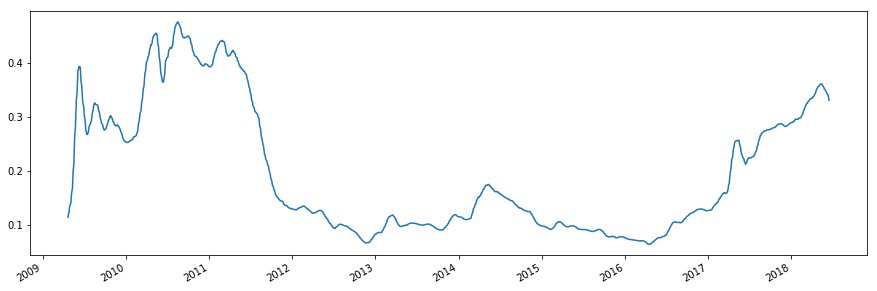

In [14]:
ts_data_ma = ts_data.rolling(20).mean()
ts_data_ma.plot(figsize=(15, 5))

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

## Read news data

In [16]:
import pandas as pd
import os

In [18]:
titleFiles = [x for x in os.listdir("../scrapped-data-1560265947865/titles/") if x.endswith(".txt")]
textFiles = [x for x in os.listdir("../scrapped-data-1560265947865/texts/") if x.endswith(".txt")]

titles, texts = [], []
for title_file in titleFiles:
    with open("../scrapped-data-1560265947865/titles/" + title_file, encoding="utf-8") as f:
        titles.append(f.read())
for text_file in textFiles:
    with open("../scrapped-data-1560265947865/texts/" + text_file, encoding="utf-8") as f:
        texts.append(f.read())

news_title_data = pd.DataFrame({"date": titleFiles, "title": titles}) 
news_texts_data = pd.DataFrame({"date": textFiles, "text": texts}) 

In [19]:
news_title_data.head()

,date,title
0,2009-08-10T17:30:01+03:00.txt,Инвесторы прогнозируют дальнейший рост украинс...
1,2016-09-29T17:40:00+03:00.txt,Стратегия на рынках капитала в ЦВЕ и других ре...
2,2017-08-19T20:00:00+03:00.txt,Главное за неделю: изменения в валютное законо...
3,2014-06-05T09:19:46+03:00.txt,Всеукраинская акция Райффайзен Банка Аваль «Ве...
4,2016-06-03T20:48:00+03:00.txt,Райффайзен Банк Аваль — снова среди самых наде...


In [20]:
news_texts_data.head()

,date,text
0,2009-08-10T17:30:01+03:00.txt,\nХотелось бы отметить один важный и необычный...
1,2016-09-29T17:40:00+03:00.txt,\nНовая норма. Сохранение низких процентных ст...
2,2017-08-19T20:00:00+03:00.txt,\nПрогноз на выходные. Куда катится наличный д...
3,2014-06-05T09:19:46+03:00.txt,\nОдесская областная дирекция Райффайзен Банка...
4,2016-06-03T20:48:00+03:00.txt,\nРайффайзен Банк Аваль снова занял ведущие по...


In [21]:
news_data = pd.merge(news_title_data, news_texts_data)

In [22]:
news_data.head()

,date,title,text
0,2009-08-10T17:30:01+03:00.txt,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...
1,2016-09-29T17:40:00+03:00.txt,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...
2,2017-08-19T20:00:00+03:00.txt,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...
3,2014-06-05T09:19:46+03:00.txt,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...
4,2016-06-03T20:48:00+03:00.txt,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...


In [23]:
date_ex = "2009-08-10T17:30:01+03:00.txt"
time_parsed = date_ex[:-10].split("T")[1]
date_parsed = date_ex[:-10].split("T")[0]
print(time_parsed, date_parsed)

17:30:01 2009-08-10


In [24]:
news_data.describe()

,date,title,text
count,1572,1572,1572
unique,1572,1554,1571
top,2015-03-14T13:28:00+02:00.txt,РА «Стандарт-Рейтинг» обновило рейтинги Райффа...,"\nак сообщалось ранее, с марта 2016 года в Рай..."
freq,1,4,2


In [25]:
news_data["time"] = [date[:-10].split("T")[1] for date in news_data.date]
news_data["date"] = [date[:-10].split("T")[0] for date in news_data.date]

In [26]:
news_data.head()

,date,title,text,time
0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01
1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00
2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00
3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46
4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00


In [27]:
news_data.head(20)

,date,title,text,time
0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01
1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00
2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00
3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46
4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00
5,2013-09-05,Индекс «Украинской биржи» UX завершил день неб...,\nИндекс «Украинской биржи» UX завершил день с...,19:03:49
6,2010-10-19,Суд закрыл дело о банкротстве «Хлеба Украины»,"\nСегодня, 19 октября, стало известно, что Хоз...",12:17:27
7,2017-06-02,Райффайзен Банк Интернациональ запускает финте...,"\n1 июня 2017 года Йоганн Штробль, председател...",14:59:00
8,2014-12-03,Что помогло одному из крупнейших банков страны...,\nПосле продажи УкрСиббанка финансовой группе ...,12:02:00
9,2013-12-03,12 декабря в Киеве начинает работу XI Ежегодна...,\nЦелью Конференции является обсуждение актуал...,11:47:53


In [28]:
import sys
!{sys.executable} -m pip install tokenize_uk

  Running setup.py bdist_wheel for tokenize-uk ... done
  Stored in directory: /Users/madtaras/Library/Caches/pip/wheels/2c/e1/95/fd8af5b40aeebdc4e178974e7f638f5553aa8772117054db9e
Successfully built tokenize-uk
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [50]:
from langdetect import detect

news_data["lang"] = [detect(text) for text in news_data.text]

In [51]:
news_data.head(30)

,date,title,text,time,lang
0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01,ru
1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00,ru
2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00,ru
3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46,ru
4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00,ru
5,2013-09-05,Индекс «Украинской биржи» UX завершил день неб...,\nИндекс «Украинской биржи» UX завершил день с...,19:03:49,ru
6,2010-10-19,Суд закрыл дело о банкротстве «Хлеба Украины»,"\nСегодня, 19 октября, стало известно, что Хоз...",12:17:27,ru
7,2017-06-02,Райффайзен Банк Интернациональ запускает финте...,"\n1 июня 2017 года Йоганн Штробль, председател...",14:59:00,ru
8,2014-12-03,Что помогло одному из крупнейших банков страны...,\nПосле продажи УкрСиббанка финансовой группе ...,12:02:00,ru
9,2013-12-03,12 декабря в Киеве начинает работу XI Ежегодна...,\nЦелью Конференции является обсуждение актуал...,11:47:53,ru


In [52]:
news_data.to_csv("news_data.csv", encoding='utf-8')

In [53]:
import pandas as pd
from tokenize_uk import tokenize_uk
import io
import numpy as np
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
import random
random.seed(0)
torch.manual_seed(0)

In [54]:
ls

20100401_20100501_Quote_log_SPOT.CSV
ML project.ipynb
Models/
README.md
bavl_data.csv
news_data.csv
timeseries_data.csv
Тетяна Баценко - Варіант 2.ipynb


In [55]:
#!/usr/bin/python
#
# This example shows how to use the MITIE Python API to perform named entity
# recognition and also how to run a binary relation detector on top of the
# named entity recognition outputs.
#
import sys, os
# Make sure you put the mitielib folder into the python search path.  There are
# a lot of ways to do this, here we do it programmatically with the following
# two statements:


from mitie import *
from collections import defaultdict


print("loading NER model...")
ner_uk = named_entity_extractor('Models/uk_model.dat')
print("\nTags output by this NER model:", ner_uk.get_possible_ner_tags())


loading NER model...

Tags output by this NER model: ['LOC', 'ORG', 'PERS', 'MISC']


In [72]:
# Load a text file and convert it into a list of words.
tokens = tokenize(news_data.text[0].encode('utf-8'))
tokens = list(map(lambda x : x.decode('utf-8'), tokens))
print("Tokenized input:", tokens)

entities = ner_uk.extract_entities(tokens)
print("\nEntities found:", entities)
print("\nNumber of entities detected:", len(entities))

Tokenized input: ['Хотелось', 'бы', 'отметить', 'один', 'важный', 'и', 'необычный', 'момент', 'на', 'украинских', 'фондовых', 'площадках', '.', 'Рост', 'количества', 'совершенных', 'сделок', 'и', 'объема', 'торгов', 'растет', 'третью', 'неделю', 'подряд', '(', 'это', 'особенно', 'ярко', 'видно', 'на', '«Украинской', 'бирже»', ')', '.', 'Это', 'говорит', 'о', 'том', ',', 'что', 'подъем', 'основан', 'на', 'относительно', 'прочном', 'фундаменте', ',', 'при', 'этом', 'можно', 'заметить', ',', 'что', 'во', 'время', 'коррекции', 'рынков', 'активность', 'немного', 'снижается', '.', 'Это', 'в', 'свою', 'очередь', ',', 'свидетельствует', 'о', 'том', ',', 'что', 'в', 'большинстве', 'своем', 'инвесторы', 'прогнозируют', 'дальнейший', 'рост', 'котировок', 'акций', 'отечественных', 'предприятий', '.', 'Удачная', 'неделя', 'для', 'рынка', 'акций', 'Прошедшая', 'неделя', 'для', 'украинского', 'рынка', 'акций', 'оказалась', 'весьма', 'удачной', 'для', 'обладателей', 'длинных', 'позиций', '.', 'Индекс'

In [76]:
entities_news_data = news_data.copy()
entities_news_data['LOC'] = 0
entities_news_data['ORG'] = 0
entities_news_data['PERS'] = 0
entities_news_data.head()

,date,title,text,time,lang,LOC,ORG,PERS
0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01,ru,0,0,0
1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00,ru,0,0,0
2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00,ru,0,0,0
3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46,ru,0,0,0
4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00,ru,0,0,0


In [97]:
for index, row in entities_news_data.iterrows():
    LOC = 0
    ORG = 0
    PERS = 0
    
    tokens = tokenize(row.text.encode('utf-8'))
    tokens = list(map(lambda x : x.decode('utf-8'), tokens))
    
    entities = ner_uk.extract_entities(tokens)
    
    for item in entities:
        if item[1] == 'LOC':
            LOC += 1
        elif item[1] == 'PERS':
            PERS += 1
        elif item[1] == 'ORG':
            ORG += 1

    entities_news_data.LOC[index] = LOC
    entities_news_data.ORG[index] = ORG
    entities_news_data.PERS[index] = PERS

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [100]:
entities_news_data.head()

,date,title,text,time,lang,LOC,ORG,PERS
0,2009-08-10,Инвесторы прогнозируют дальнейший рост украинс...,\nХотелось бы отметить один важный и необычный...,17:30:01,ru,11,3,7
1,2016-09-29,Стратегия на рынках капитала в ЦВЕ и других ре...,\nНовая норма. Сохранение низких процентных ст...,17:40:00,ru,15,2,19
2,2017-08-19,Главное за неделю: изменения в валютное законо...,\nПрогноз на выходные. Куда катится наличный д...,20:00:00,ru,8,8,29
3,2014-06-05,Всеукраинская акция Райффайзен Банка Аваль «Ве...,\nОдесская областная дирекция Райффайзен Банка...,09:19:46,ru,0,1,1
4,2016-06-03,Райффайзен Банк Аваль — снова среди самых наде...,\nРайффайзен Банк Аваль снова занял ведущие по...,20:48:00,ru,1,4,0


In [101]:
entities_news_data.to_csv("entities_news_data.csv", encoding='utf-8')